# 프로젝트 설명<br>
- 이번 프로젝트의 목표는 잠재 고객을 찾아내는 것입니다.
- 은행은 대출 고객을 통해 이자 수익을 얻기를 원합니다.
- 은행이 지난해 고객을 대상으로 진행한 캠페인은 9% 이상의 성공률을 보였습니다.

- 대출을 구매할 가능성이 더 높은 잠재 고객을 식별하는 데 도움이 되는 모델을 구축한다면 캠페인 성공률을 더욱 높일 수 있을 것입니다.

# 데이터 설명<br>
은행의 고객 데이터 입니다.

Personal Loan 변수가 우리가 예측하고 싶은 타겟 변수 입니다.  
고객들의 다른 데이터를 바탕으로 해당 고객이 대출 권유에 응할지 응하지 않을지 예측합니다.

---
데이터 변수 설명

* ID : 1번부터 5000번 까지 변환 처리된 고객 ID 
* Age : 고객의 나이
* Experience : 가입기간(년)
* Income : 연소득 (달러)
* Zip Code : 우편번호
* Family : 고객의 가족 규모
* CCAvg : 평균 신용카드 지출
* Education : 고객의 교육 수준
* Mortage : 주택담보대출의 가치
* Personal Loan : 지난 캠페인에서 대출 권유를 받아들였는지 여부 (타겟 변수)
* Securities Account : 은행에 증권 계좌를 가지고 있는지 여부
* CD Account : 은행에 예금 증명서(CD) 계좌를 가지고 있는지 여부
* Online : 인터넷 뱅킹을 사용하는지 여부
* Credit Card : 고객이 은행에서 발급한 신용카드를 사용하는지 여부

### 데이터 불러오기

In [ ]:
## 상품 수령울 위한 이름과 연락처를 주석으로 입력해주세요.
## 이름 : 
## 연락처 :

In [1]:
## 필요한 패키지들을 불러오세요.
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from  sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC


In [4]:
## 주어진 파일명을 활용하여 데이터를 불러와 할당해 보세요. (Bank_Personal_Loan_Modelling.xlsx)
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]




In [5]:
## 데이터의 정보를 확인해보세요.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 전처리

In [6]:
## 데이터의 결측치를 확인해 보세요.

print("total number of rows", len(data))
print(data.isnull().sum())

total number of rows 5000
ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64


In [7]:
## 데이터의 기본 통계치들을 요약하여 확인해 보세요.

data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
# 각각의 변수에 유니크한 값이 얼마나 있는지 확인해 보세요.
cols = data.columns
for col in cols:
    print("column:", col, " / num of unique: ", data[col].nunique())


column: ID  / num of unique:  5000
column: Age  / num of unique:  45
column: Experience  / num of unique:  47
column: Income  / num of unique:  162
column: ZIPCode  / num of unique:  467
column: Family  / num of unique:  4
column: CCAvg  / num of unique:  108
column: Education  / num of unique:  3
column: Mortgage  / num of unique:  347
column: PersonalLoan  / num of unique:  2
column: SecuritiesAccount  / num of unique:  2
column: CDAccount  / num of unique:  2
column: Online  / num of unique:  2
column: CreditCard  / num of unique:  2


In [15]:
## 데이터 통계치의 요약 정보를 보니 'Experience' 변수에 음수가 있습니다. 몇 개나 있는지 확인해보세요.
len(data[data['Experience'] < 0])

52

In [75]:
## Experience 변수가 음수인 경우, 해당 object의 Age 변수와 Education 변수를 기준으로 동일한 데이터들의 Experiecne 변수 중앙값을 찾아 치환해 보세요.

for i in range(len(data)):
    if data.loc[i, 'Experience'] < 0:
        target = data.loc[i]
        #print(target['Age'])
        neigbors = data[(data['Age'] == target['Age']) & \
            (data['Education'] == target['Education']) & \
            (data['Experience'] >= 0)]
        
        if len(neigbors) == 0:
            data.loc[i, 'Experience'] = 0
        else:
            data.loc[i, 'Experience'] = neigbors['Experience'].median()


In [76]:
## Experience 변수가 0보다 작은것이 있는지 다시 확인해 보세요.
len(data[data['Experience'] < 0])

0

### 시각화  
여러가지 시각화를 통해 데이터를 탐색해 보세요.

<AxesSubplot:>

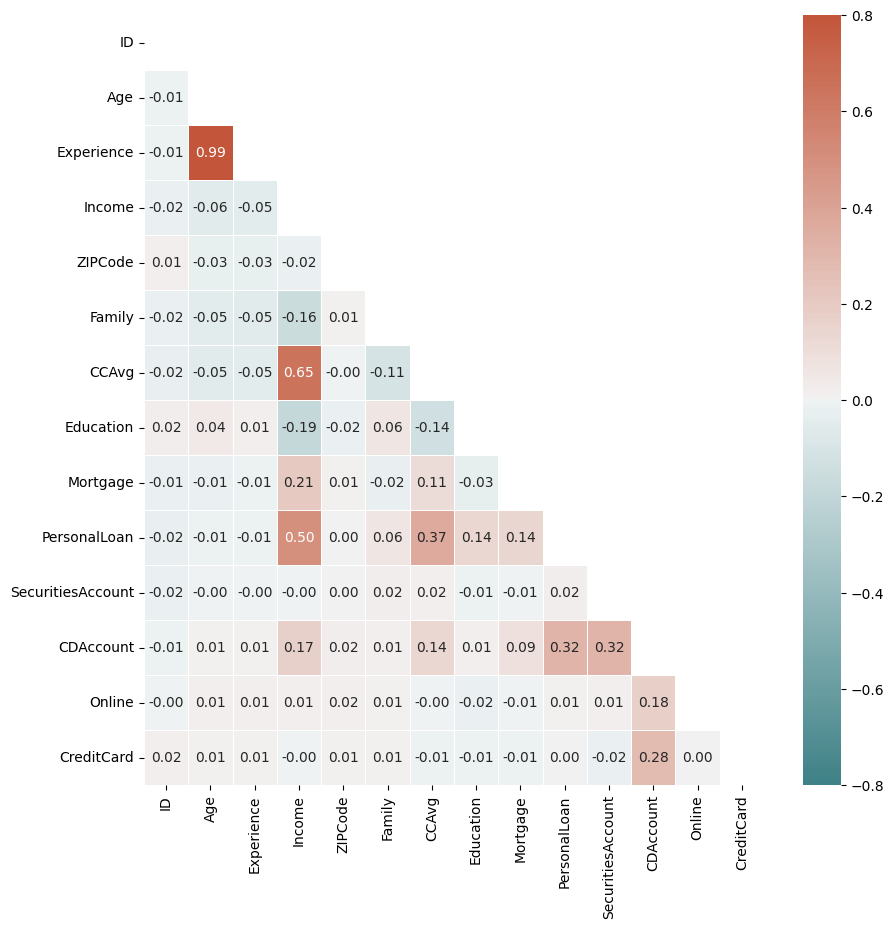

In [79]:
### Remove rows with missing value on 'RainTomorrow'

# Correlation Analysis
corr = data.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(200, 20, as_cmap=True)

plt.figure(figsize=(10,10))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2f', linewidths=.5, cmap=cmap, vmin=-.8, vmax=.8)

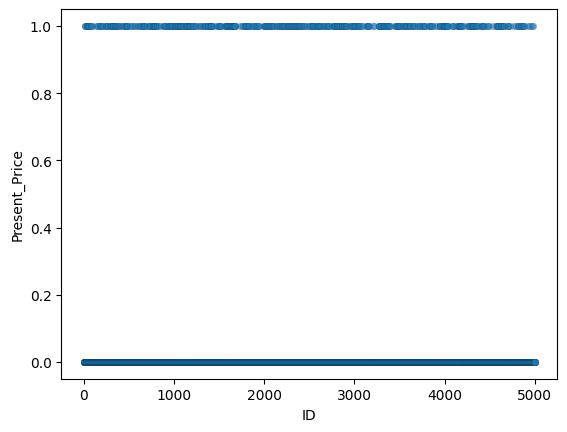

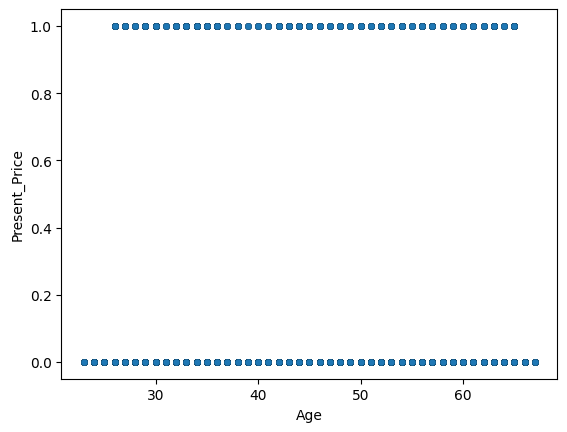

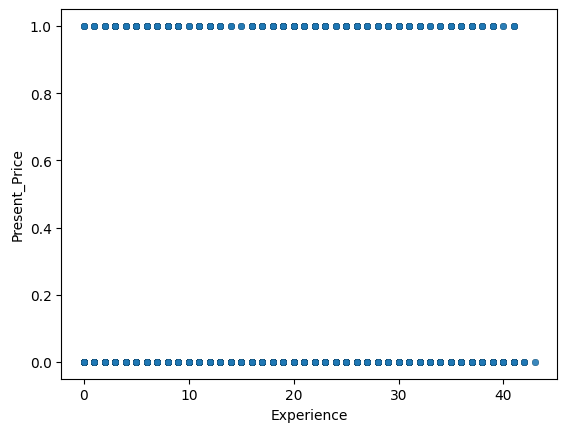

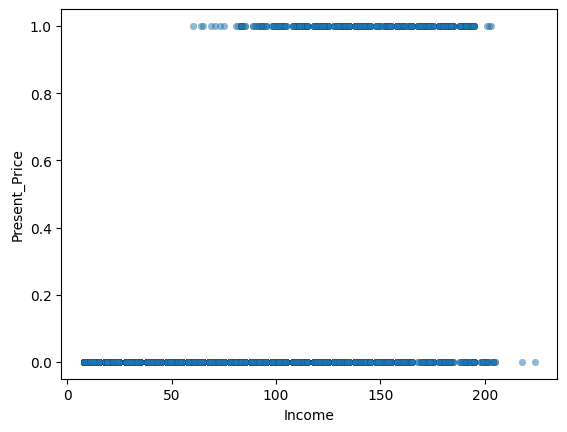

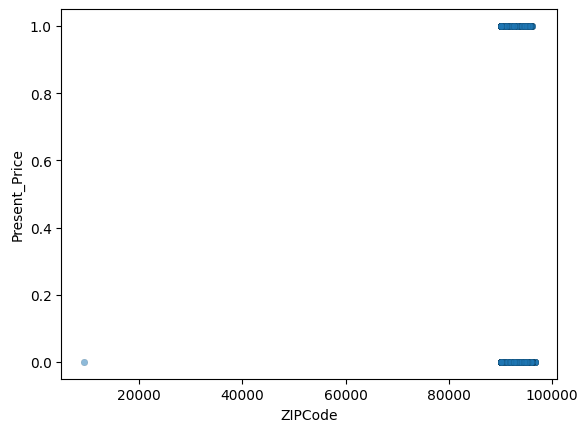

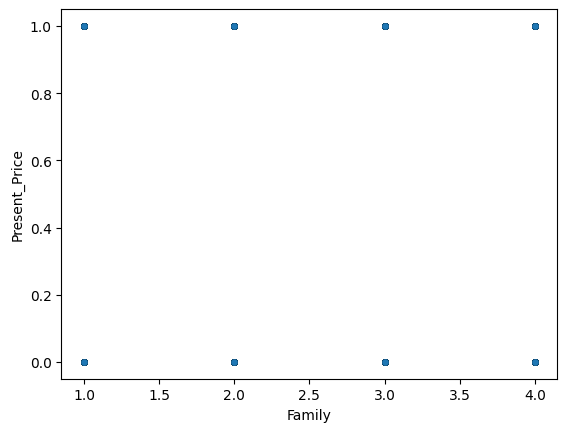

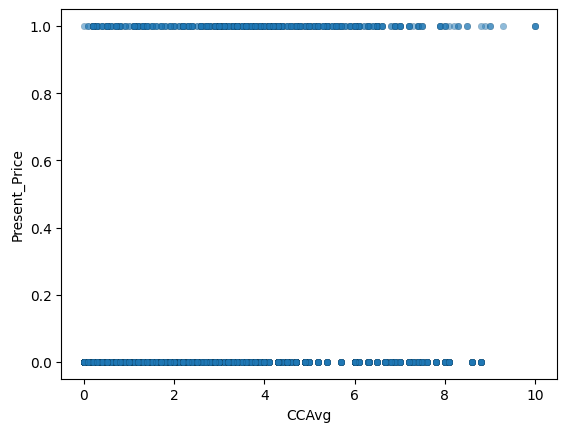

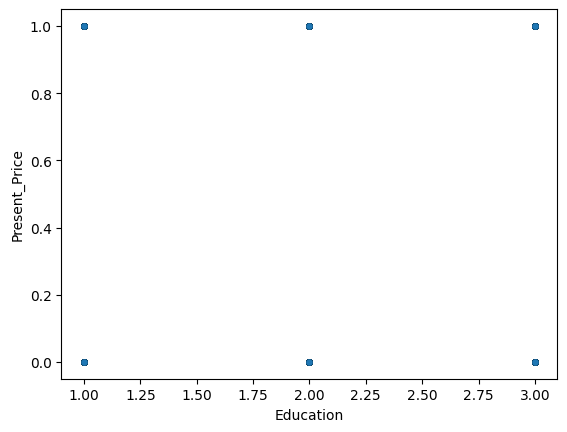

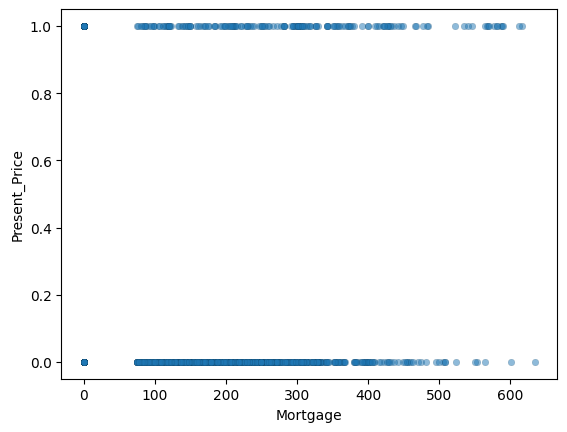

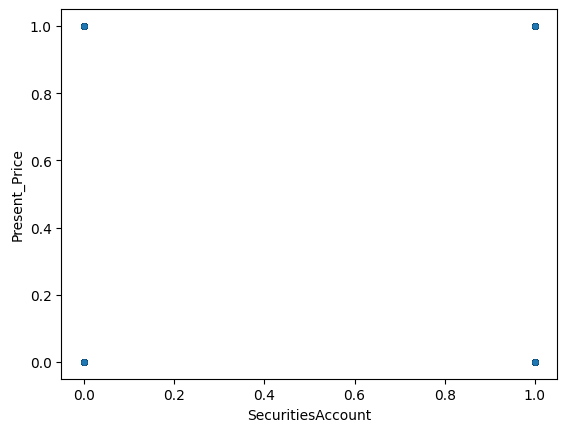

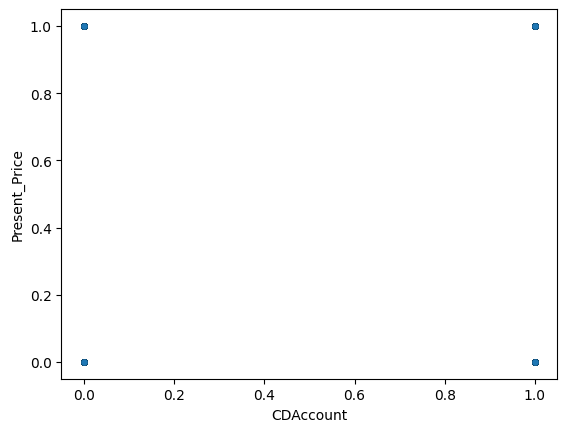

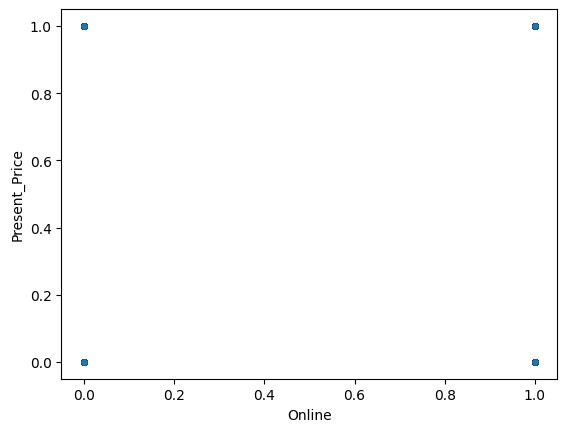

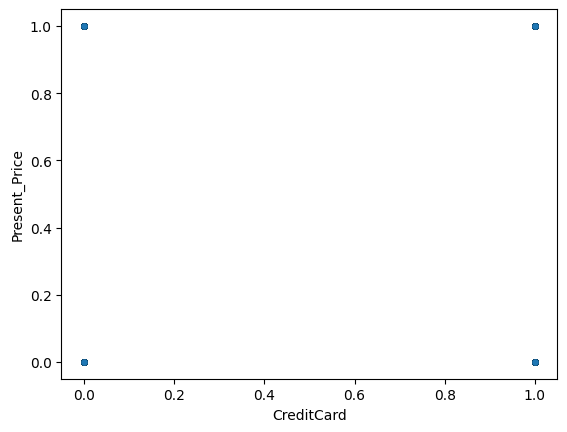

In [89]:
for idx, col in enumerate(data.columns):
    if col == 'PersonalLoan':
        continue
    plt.scatter(data[col], data['PersonalLoan'], s=24, edgecolors='black', linewidth=0.1, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Present_Price')
    plt.show()

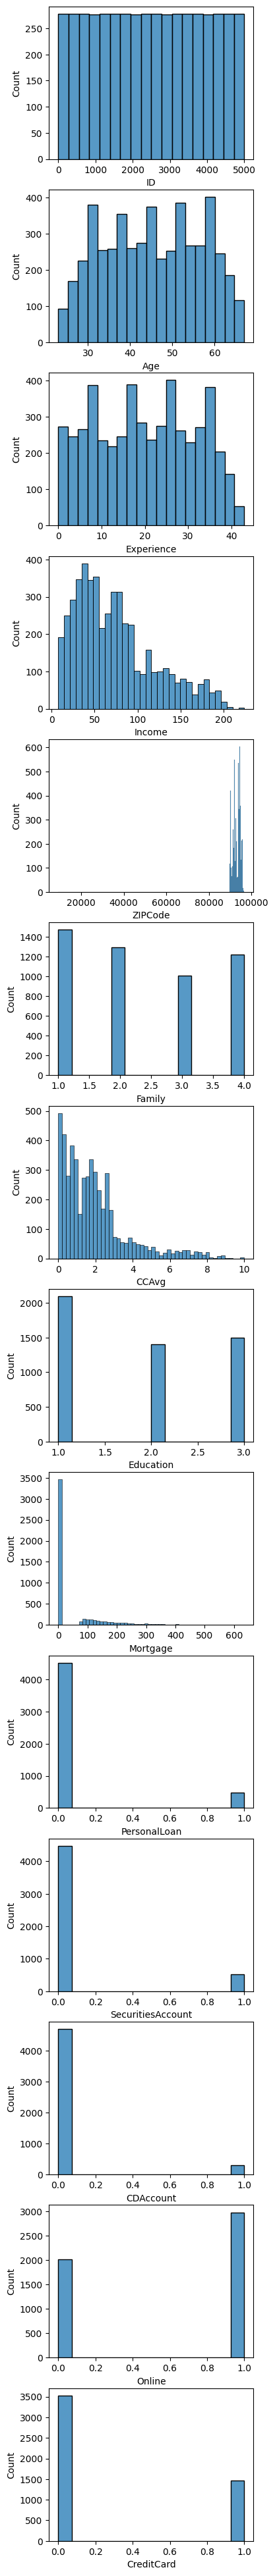

In [86]:
fig, ax = plt.subplots(nrows=len(data.columns), figsize=(4, 50))
for idx, col in enumerate(data.columns):
    sns.histplot(data[col], ax=ax[idx])


### 모델 적용
데이터를 트레인, 테스트 셋으로 나누고 여러가지 모델을 통해 예측과 평가를 실행해 보세요.

In [90]:
# Feature Selection
data_final = data[['Income', 'CCAvg', 'Education', 'Mortgage', 'PersonalLoan']]

# Data Scaling
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(data_final)
print(fitted.data_max_)

dataset = min_max_scaler.transform(data_final)
dataset = pd.DataFrame(dataset, columns=data_final.columns, index=list(data_final.index))

print(dataset.head())



[224.  10.   3. 635.   1.]
     Income  CCAvg  Education  Mortgage  PersonalLoan
0  0.189815   0.16        0.0       0.0           0.0
1  0.120370   0.15        0.0       0.0           0.0
2  0.013889   0.10        0.0       0.0           0.0
3  0.425926   0.27        0.5       0.0           0.0
4  0.171296   0.10        0.5       0.0           0.0


In [91]:
# Train/Test Splitting
X = dataset.drop(['PersonalLoan'], axis=1)
y = dataset['PersonalLoan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


print("X_train's shape : ", X_train.shape)
print("X_test's shape : ", X_test.shape)
print("y_train's shape : ", y_train.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (4500, 4)
X_test's shape :  (500, 4)
y_train's shape :  (4500,)
y_test's shape :  (500,)


### Decision tree classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.952

### Naive Bayes

In [100]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.916

### Random Forest classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, min_samples_split=8).fit(X_train, y_train)
clf.score(X_test, y_test)

0.968

### KNN ( K - Nearest Neighbour )

Text(0, 0.5, 'accuracy')

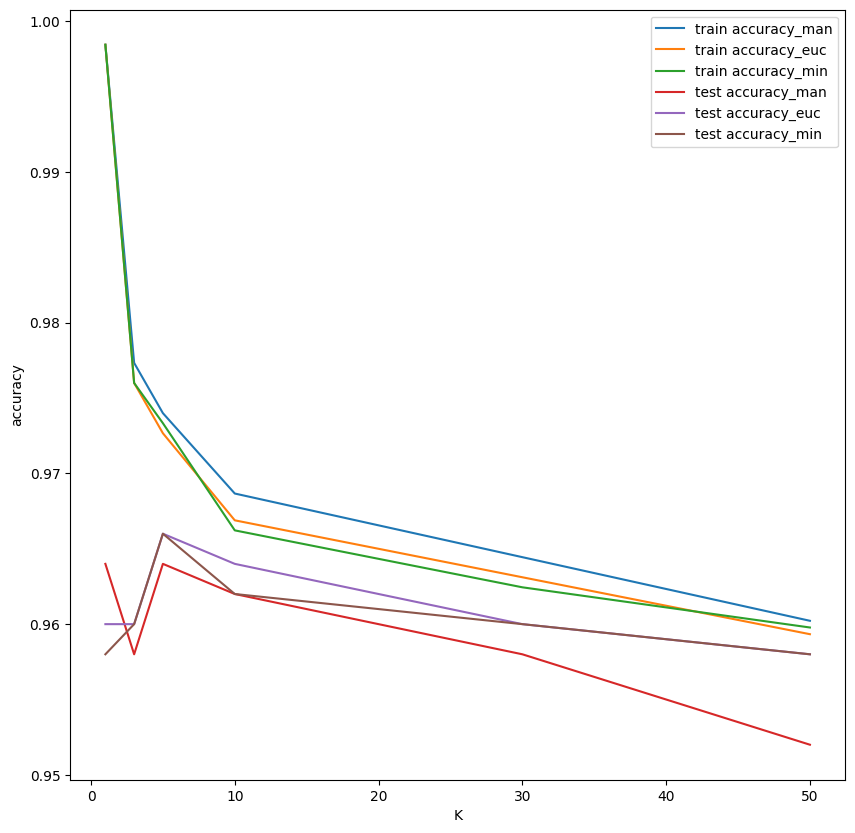

In [147]:
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

train_acc_man = []
train_acc_euc = []
train_acc_min = []
test_acc_man = []
test_acc_euc = []
test_acc_min = []
metrics = [1, 2, 3]  # p=1: manhattan, p=2:euclidean p=3: minkowski

K = [1, 3, 5, 10, 30, 50]
for k in K :
  for metric_p in metrics :
    clf = make_pipeline(StandardScaler(), Knn(n_neighbors = k, p = metric_p)).fit(X_train, y_train) 
    # training, test set 정확도 계산
    train_result = clf.predict(X_train)
    test_result = clf.predict(X_test)
    # distance metric에 따라 정확도 계산
    if metric_p == 1 :
      train_acc_man.append(accuracy_score(y_train, train_result))
      test_acc_man.append(accuracy_score(y_test, test_result))
    elif metric_p == 2 :
      train_acc_euc.append(accuracy_score(y_train, train_result))
      test_acc_euc.append(accuracy_score(y_test, test_result))
    else :
      train_acc_min.append(accuracy_score(y_train, train_result))
      test_acc_min.append(accuracy_score(y_test, test_result))


plt.figure(figsize=[10, 10])
plt.plot(K, train_acc_man, label='train accuracy_man')
plt.plot(K, train_acc_euc, label='train accuracy_euc')
plt.plot(K, train_acc_min, label='train accuracy_min')
plt.plot(K, test_acc_man, label='test accuracy_man')
plt.plot(K, test_acc_euc, label='test accuracy_euc')
plt.plot(K, test_acc_min, label='test accuracy_min')
plt.legend()
plt.xlabel('K')
plt.ylabel('accuracy')

In [151]:
clf = make_pipeline(StandardScaler(), Knn(n_neighbors = 5, p = 2)).fit(X_train, y_train) 
# training, test set 정확도 계산
    
test_result = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.966


### Model comparison  
여러가지 모델을 비교하여 최적의 모델을 찾아보세요.